In [1]:
# imports
%matplotlib inline
import seaborn as sns
from pyrt.data.data_trots import *
from pyrt.optimization.vmat import *
from pyrt.tools import print_structure_info
from pyrt.research.run_functions import *


In [2]:
# Josh Inputs - Prostate
# Find work directory
# cwd = '/Users/troy/Dropbox/CAP Group/TROTS/Prostate_VMAT/'
working_directory = 'outputs_josh/'
cwd = '/Users/jtmargo/Desktop/Josh/Clemson University/Research/Treatment Plan/TROTS Data/Prostate_VMAT/'

vmat_model_params = {
    'target_weights':{'PTV':1000., 'default':500.},
    'oar_weights':{'Rectum':10., 'Bladder':10., 'default':1.},
    'max_intensity':1000.,
    'min_intensity': 0.,
    'aper_limit': 1.
}


input_dict = {
    'cwd': cwd,
    'figure_directory':working_directory,
    'filename': None,
    'Rx': {'PTV': 79.56, 'PTV Vesicles': 72.2},
    'model_params':vmat_model_params
}



In [ ]:
#Run all cases
case = 'Prostate_VMAT'
runall(input_dict)

In [7]:
print input_dict['cwd']
input_dict['filename'] = 'Prostate_VMAT_101.mat'
print input_dict['filename']

/Users/jtmargo/Desktop/Josh/Clemson University/Research/Treatment Plan/TROTS Data/Prostate_VMAT/
Prostate_VMAT_101.mat


---------------------
|  Reading in data  |
---------------------
Building Structures
importing PTV Dij as dense matrix, converting to sparse...
importing PTV Shell 50 mm Dij as dense matrix, converting to sparse...
importing External Ring 20 mm Dij as sparse matrix
importing PTV Shell 5 mm Dij as dense matrix, converting to sparse...
importing PTV Shell 15 mm Dij as dense matrix, converting to sparse...
importing PTV Shell 25 mm Dij as dense matrix, converting to sparse...
importing Rectum Dij as dense matrix, converting to sparse...
importing Anus Dij as dense matrix, converting to sparse...
importing Hip (L) Dij as dense matrix, converting to sparse...
importing Hip (R) Dij as dense matrix, converting to sparse...
importing Bladder Dij as dense matrix, converting to sparse...
importing Patient Dij as dense matrix, converting to sparse...
Building CP
----------------------------
|  Data reading completed  |
----------------------------
---------------------------
|  Building Gurobi M

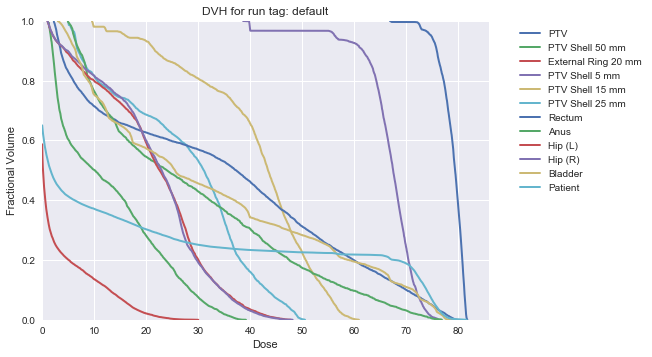

In [3]:
#Run individual case

# Load patient information
input_dict['filename'] = 'Prostate_VMAT_101.mat'

run_case(input_dict)



In [ ]:
# # Josh Inputs - H&N
# # Find work directory
# # cwd = '/Users/troy/Dropbox/CAP Group/TROTS/Prostate_VMAT/'
# working_directory = 'outputs_josh/'
# cwd = '/Users/jtmargo/Desktop/Josh/Clemson University/Research/Treatment Plan/TROTS Data/Head-and-Neck/'


# # Load patient information
# filename = 'Prostate_VMAT_101.mat'

# imrt_model_params = {
#     'target_weights':{'PTV 0-46 Gy':1000., 'default':500.},
#     'oar_weights':{'Rectum':10., 'Bladder':10., 'default':1.},
#     'maxIntensity':1.,
#     'minIntensity': 0.
# }


# input_dict = {
#     'cwd': cwd,
#     'figure_directory':working_directory,
#     'filename': filename,
#     'Rx': {'PTV 0-46 Gy': 47.15},
#     'model_params':vmat_model_params
# }

In [3]:
model = vmat_mip(input_dict)

---------------------
|  Reading in data  |
---------------------
Building Structures
importing PTV Dij as dense matrix, converting to sparse...
importing PTV Shell 50 mm Dij as dense matrix, converting to sparse...
importing External Ring 20 mm Dij as sparse matrix
importing PTV Shell 5 mm Dij as dense matrix, converting to sparse...
importing PTV Shell 15 mm Dij as dense matrix, converting to sparse...
importing PTV Shell 25 mm Dij as dense matrix, converting to sparse...
importing Rectum Dij as dense matrix, converting to sparse...
importing Anus Dij as dense matrix, converting to sparse...
importing Hip (L) Dij as dense matrix, converting to sparse...
importing Hip (R) Dij as dense matrix, converting to sparse...
importing Bladder Dij as dense matrix, converting to sparse...
importing Patient Dij as dense matrix, converting to sparse...
Building CP
----------------------------
|  Data reading completed  |
----------------------------


In [ ]:
model.m.write('output.lp')

In [4]:
model.optimize()

Optimize a model with 236912 rows, 154668 columns and 1656937 nonzeros
Variable types: 154645 continuous, 23 integer (23 binary)
Coefficient statistics:
  Matrix range     [8e-09, 1e+03]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+01]
Found heuristic solution: objective 3.9064e+08
Presolve removed 222197 rows and 144840 columns
Presolve time: 3.41s
Presolved: 14715 rows, 9828 columns, 137120 nonzeros
Variable types: 9828 continuous, 0 integer (0 binary)

Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
    1106    7.3376021e+06   8.758081e+03   0.000000e+00      5s
    4602    1.1549916e+07   4.291325e+03   0.000000e+00     10s
    8098    1.2874780e+07   1.768863e+03   0.000000e+00     15s
    8953    1.2943723e+07   0.000000e+00   0.000000e+00     16s

Root relaxation: objective 1.294372e+07, 8953 iterations, 12.39 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work

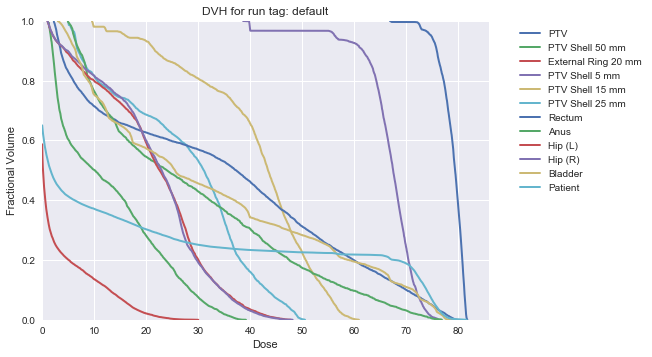

In [5]:
model.plot_DVH(run_tag='default',saveDVH=True, num_bins = 500)

In [6]:
for cp in range(model.data.num_control_points):
    for a in range(len(model.apertures_per_cp[cp])):
        print model.aper_intensity_var[cp][a].x

1000.0
1000.0
0.0
0.0
189.972485309
1000.0
1000.0
1000.0
1000.0
1000.0
0.0
0.0
0.0
0.0
922.83082972
1000.0
1000.0
1000.0
1000.0
612.800549556
0.0
0.0
656.947180648


In [ ]:
model.run_title  = 'test_optimized'
model.optimize(display=5)

In [ ]:
model.plot_DVH(run_tag='test_optimized',saveDVH=True, num_bins = 500)

In [8]:
hello_world()

hello world
